Estudantes: Gustavo Haerthel, Gustavo Voss e Rodrigo Leitzke.

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [167]:
# Função que exibe o ambiente na tela
def exibir(matriz):
    global posAPAx
    global posAPAy
    plt.imshow(matriz, 'gray')
    plt.nipy_spectral()
    plt.plot([posAPAy],[posAPAx], marker='o', color='r', ls='')
    plt.show(block=False)
    plt.pause(1.5)
    plt.clf()

In [176]:
matriz = [
    [1,    1,    1,    1,    1, 1],
    [1, None, None, None, None, 1],
    [1, None, None, None, None, 1],
    [1, None, None, None, None, 1],
    [1, None, None, None, None, 1],
    [1,    1,    1,    1,    1, 1]
]
for i in range(len(matriz)):
    for j in range(len(matriz[i])):
        if matriz[i][j] is None:
            matriz[i][j] = random.choice([0, 2])
# robô começará na primeira posição
posAPAx = 1
posAPAy = 1
# variáveis auxiliares para legibilidade do código
parede  = 1
sujeira = 2

Agente reativo simples

In [169]:
def mover(dx, dy):
    global posAPAx
    global posAPAy

    nova_x = posAPAx + dx
    nova_y = posAPAy + dy

    if matriz[nova_x][nova_y] != parede:
        posAPAx, posAPAy = nova_x, nova_y

def sobe(): mover(-1, 0)
def desce(): mover(1, 0)
def esquerda(): mover(0, -1)
def direita(): mover(0, 1)
def aspirar(x, y): matriz[x][y] = 0

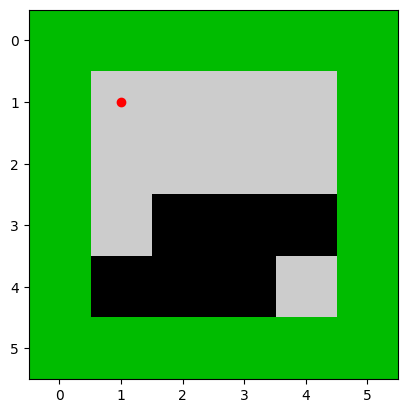

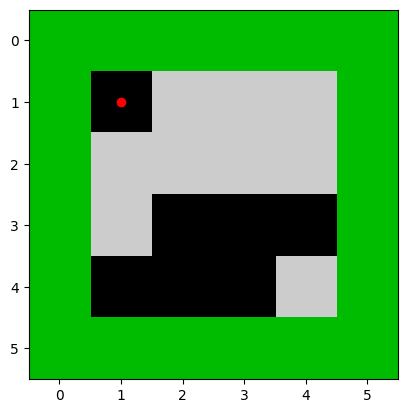

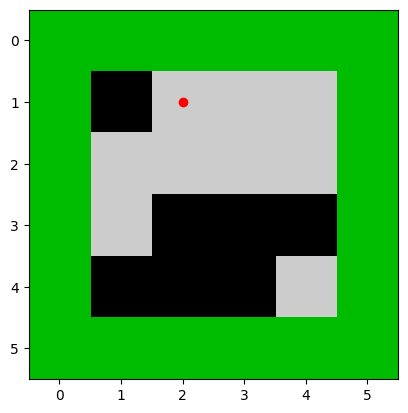

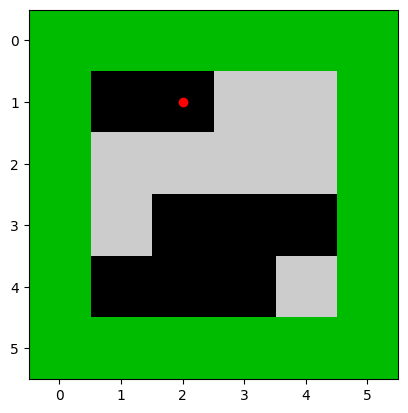

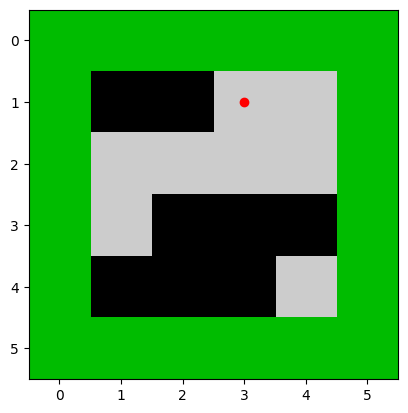

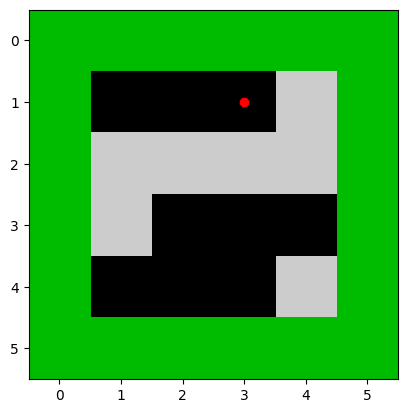

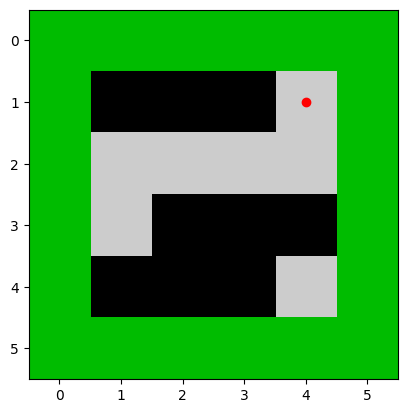

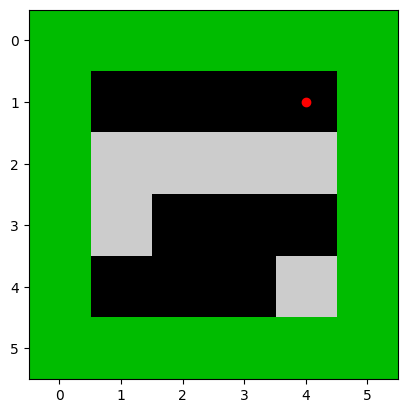

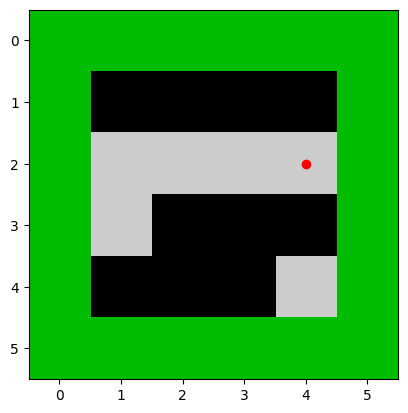

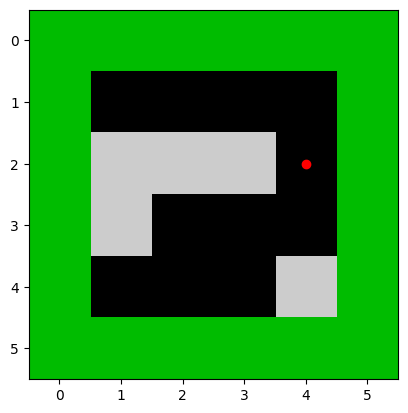

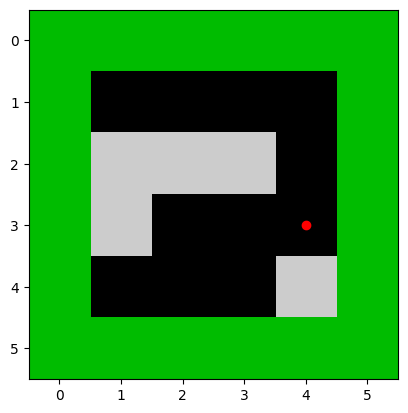

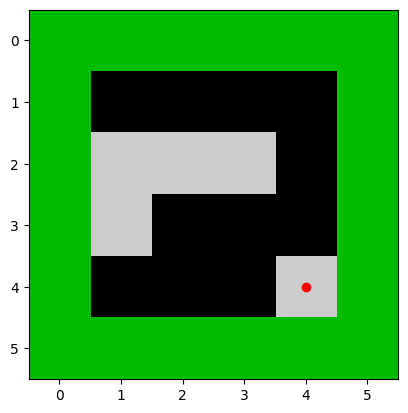

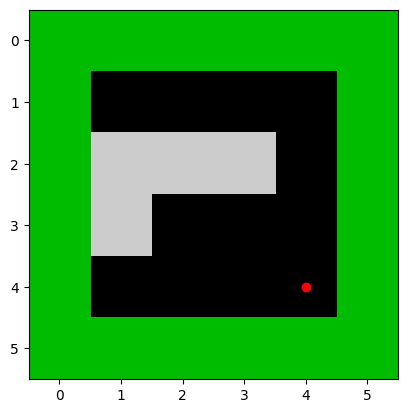

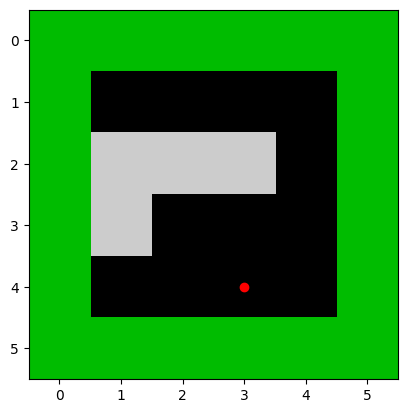

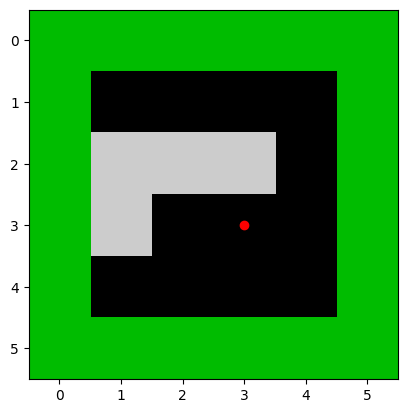

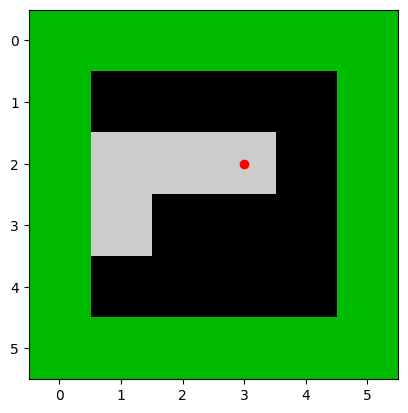

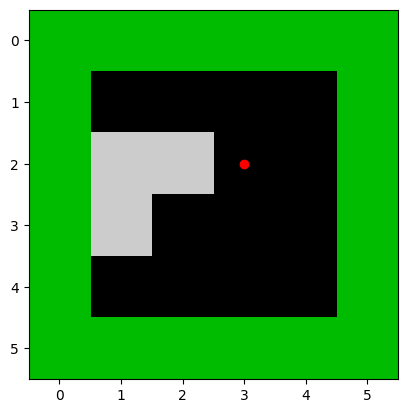

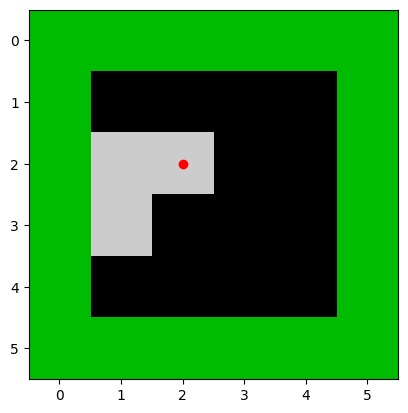

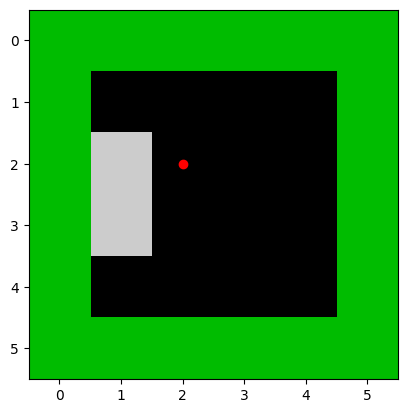

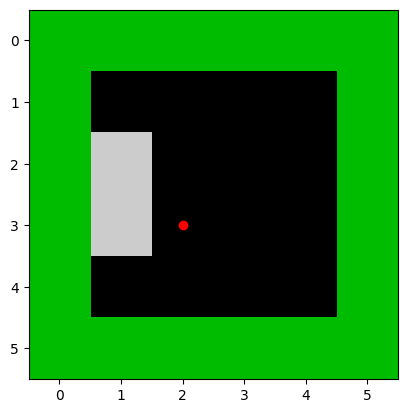

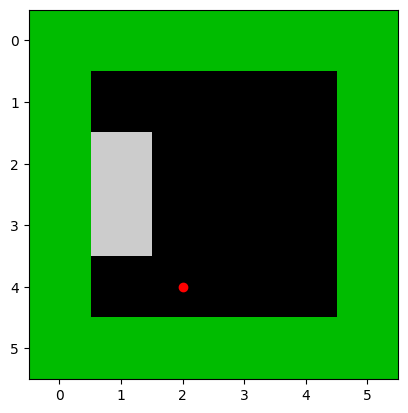

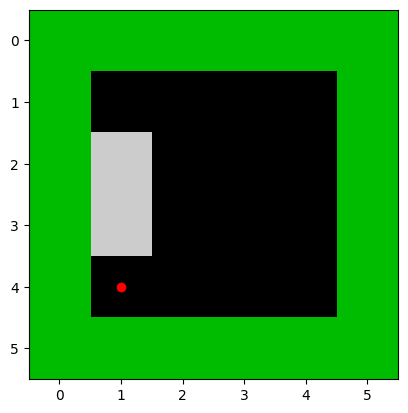

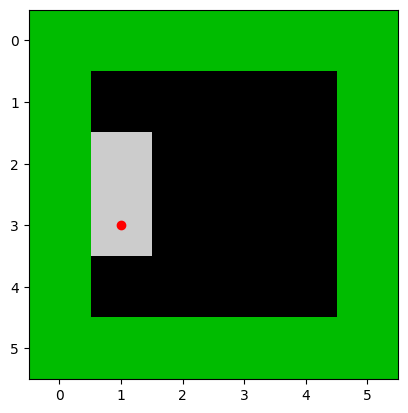

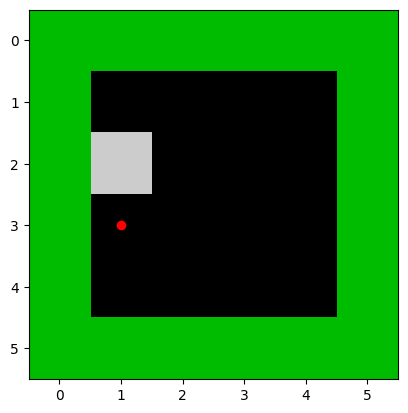

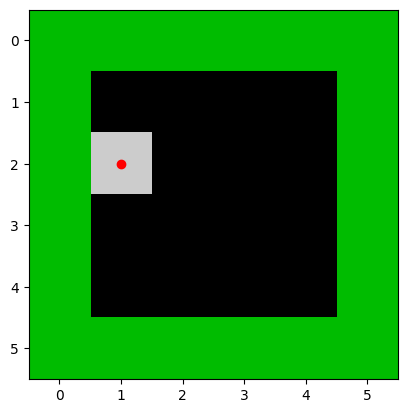

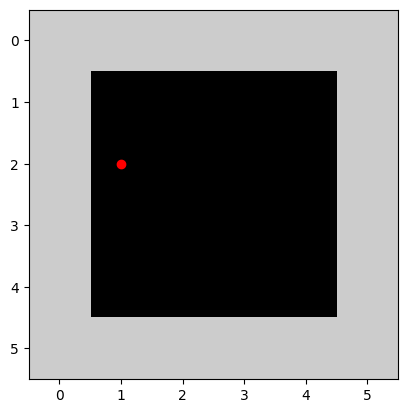

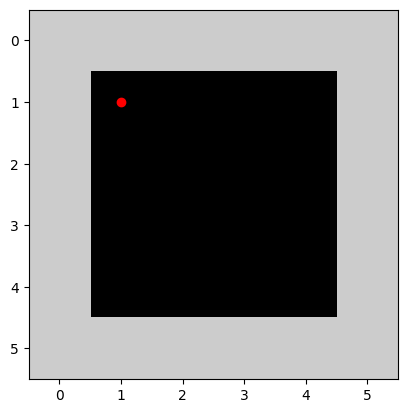

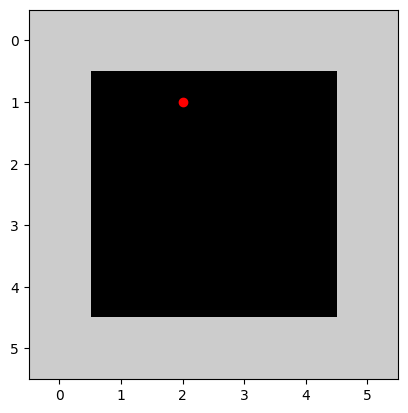

KeyboardInterrupt: 

In [175]:
movimentos = [
    "direita", "direita", "direita",
    "desce", "desce", "desce",
    "esquerda",
    "sobe", "sobe",
    "esquerda",
    "desce", "desce",
    "esquerda",
    "sobe", "sobe", "sobe"
]

# Infinito propositalmente
while True:
  for movimento in movimentos:
      exibir(matriz)

      if matriz[posAPAx][posAPAy] == sujeira:
          aspirar(posAPAx, posAPAy)
          exibir(matriz)

      if movimento == "sobe":
          sobe()
      elif movimento == "desce":
          desce()
      elif movimento == "esquerda":
          esquerda()
      elif movimento == "direita":
          direita()

Responda: A) A sua solução é extensível para um mundo 3 x 3? E para um mundo 6 x 6? Explique sua resposta.

Resposta: Não, pois como temos um caminho predefinido para um espaço 4x4, o robô aspirador não se comportaria adequadamente.

Agente baseado em objetivo

In [160]:
# Função que verifica se ainda existe sujeira
def checkObj(sala):
    for linha in sala:
        for celula in linha:
            if celula == sujeira:
                return 1
    return 0

In [177]:
visitados = set()

def agenteObjetivo(percepcao, objObtido):
    tem_sujeira = any(sujeira in linha for linha in matriz)
    if not tem_sujeira:
        print("Ambiente totalmente limpo! Encerrando.")
        return "NoOp"

    if percepcao == sujeira:
        return "aspirar"

    visitados.add((posAPAx, posAPAy))

    direcoes = {
        "desce": (1, 0),
        "direita": (0, 1),
        "sobe": (-1, 0),
        "esquerda": (0, -1)
    }

    for acao, (dx, dy) in direcoes.items():
        novo_x = posAPAx + dx
        novo_y = posAPAy + dy
        if (
            0 <= novo_x < len(matriz) and
            0 <= novo_y < len(matriz[0]) and
            matriz[novo_x][novo_y] != parede and
            (novo_x, novo_y) not in visitados
        ):
            return acao

    # Se todas as direções estiverem visitadas/bloqueadas volta por onde veio
    for acao, (dx, dy) in direcoes.items():
        novo_x = posAPAx + dx
        novo_y = posAPAy + dy
        if (
            0 <= novo_x < len(matriz) and
            0 <= novo_y < len(matriz[0]) and
            matriz[novo_x][novo_y] != parede
        ):
            return acao

    return "NoOp"

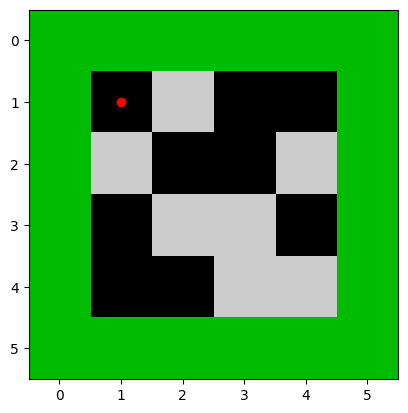

Estado da percepcao: 0 Acao escolhida: desce


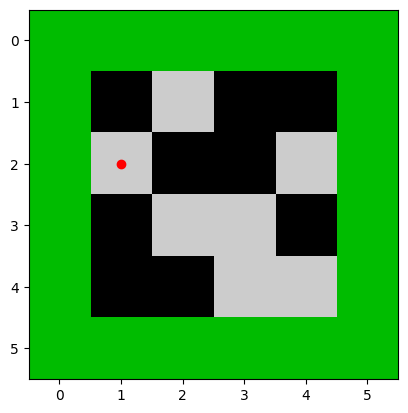

Estado da percepcao: 2 Acao escolhida: aspirar


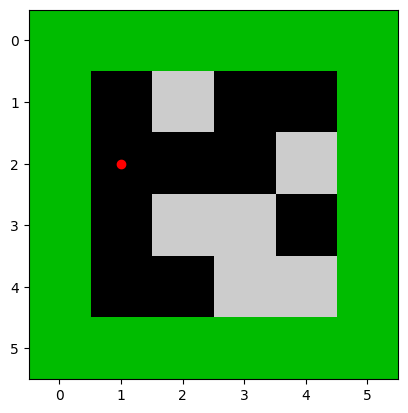

Estado da percepcao: 0 Acao escolhida: desce


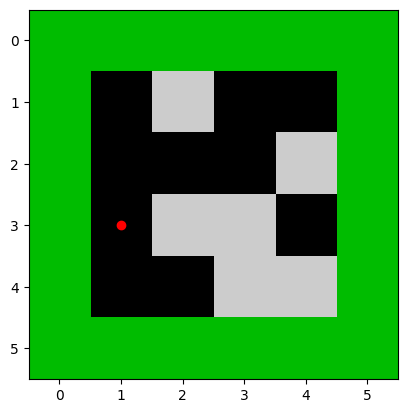

Estado da percepcao: 0 Acao escolhida: desce


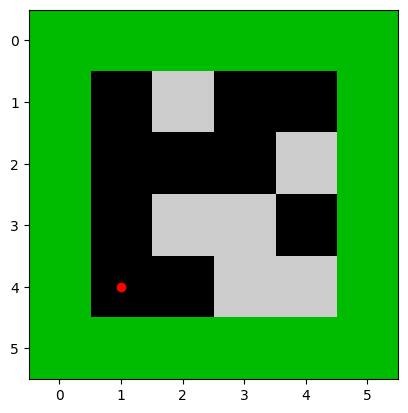

Estado da percepcao: 0 Acao escolhida: direita


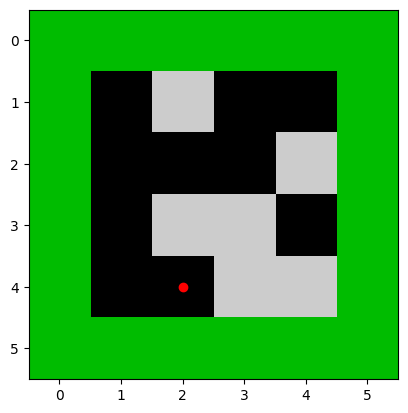

Estado da percepcao: 0 Acao escolhida: direita


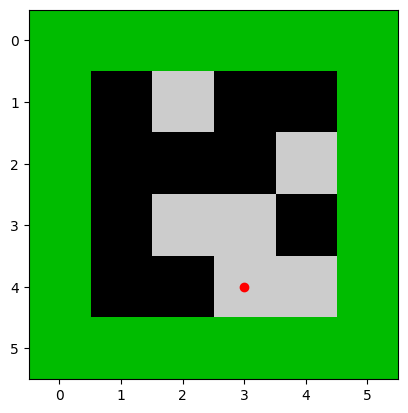

Estado da percepcao: 2 Acao escolhida: aspirar


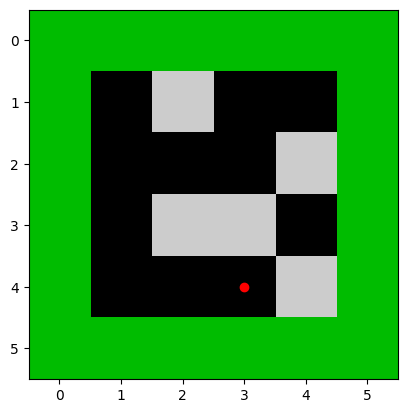

Estado da percepcao: 0 Acao escolhida: direita


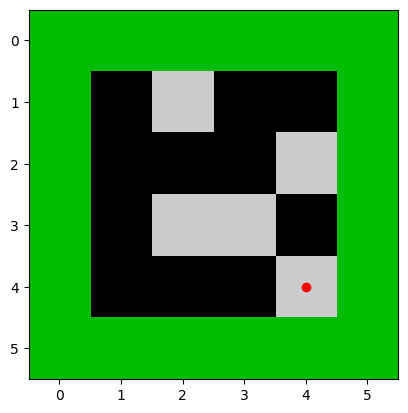

Estado da percepcao: 2 Acao escolhida: aspirar


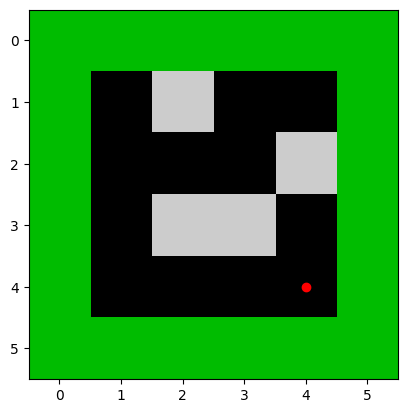

Estado da percepcao: 0 Acao escolhida: sobe


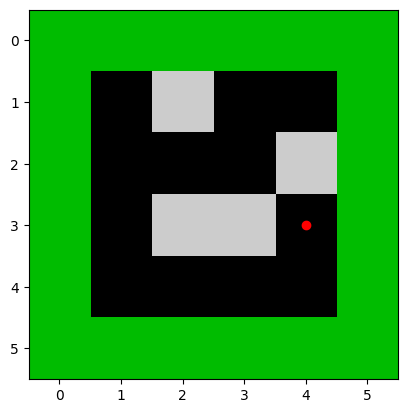

Estado da percepcao: 0 Acao escolhida: sobe


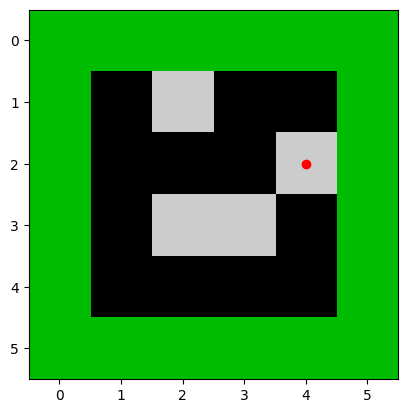

Estado da percepcao: 2 Acao escolhida: aspirar


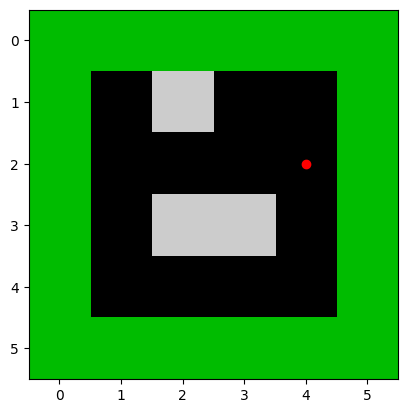

Estado da percepcao: 0 Acao escolhida: sobe


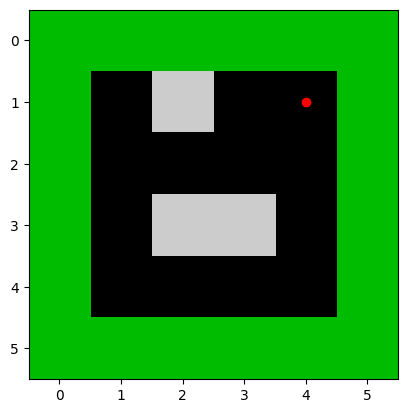

Estado da percepcao: 0 Acao escolhida: esquerda


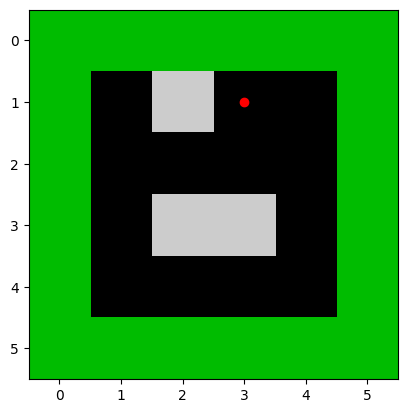

Estado da percepcao: 0 Acao escolhida: desce


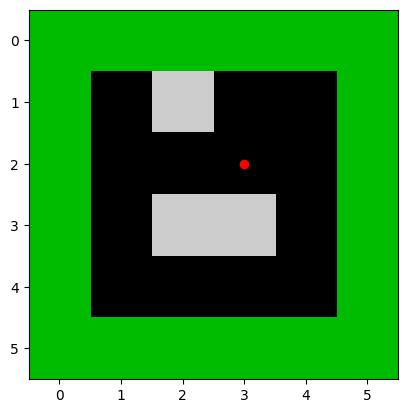

Estado da percepcao: 0 Acao escolhida: desce


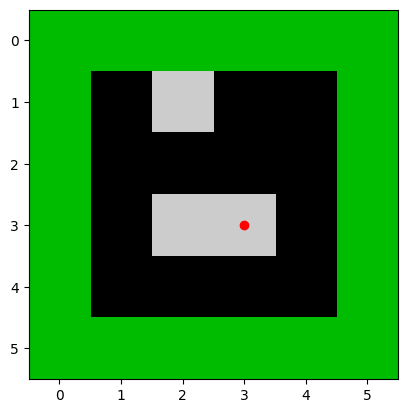

Estado da percepcao: 2 Acao escolhida: aspirar


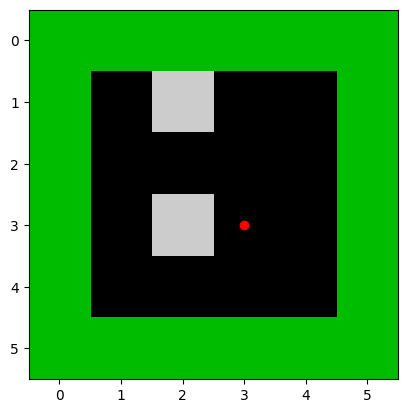

Estado da percepcao: 0 Acao escolhida: esquerda


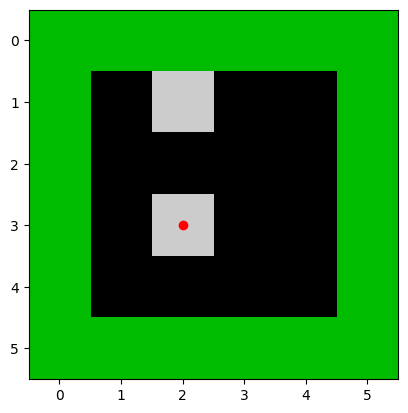

Estado da percepcao: 2 Acao escolhida: aspirar


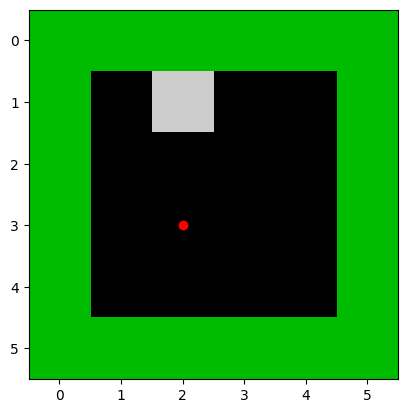

Estado da percepcao: 0 Acao escolhida: sobe


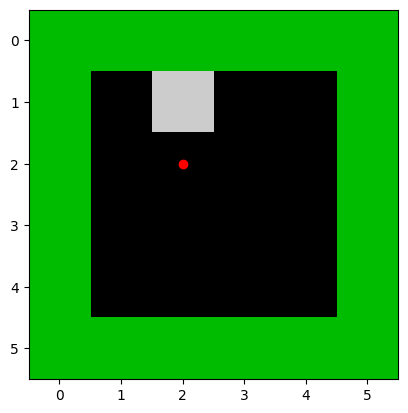

Estado da percepcao: 0 Acao escolhida: sobe


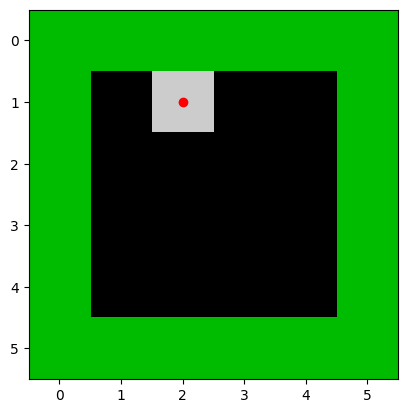

Estado da percepcao: 2 Acao escolhida: aspirar


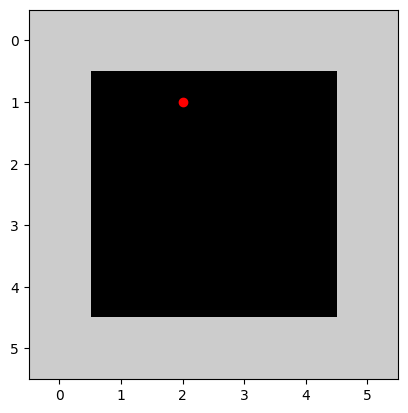

Ambiente totalmente limpo! Encerrando.
Estado da percepcao: 0 Acao escolhida: NoOp
Ponto: -> 23


<Figure size 640x480 with 0 Axes>

In [178]:
pontos = 0

while True:
    exibir(matriz)

    percepcao = matriz[posAPAx][posAPAy]
    objetivo = checkObj(matriz)

    acao = agenteObjetivo(percepcao, objetivo)
    print(f"Estado da percepcao: {percepcao} Acao escolhida: {acao}")
    pontos += 1

    if acao == "aspirar":
        aspirar(posAPAx, posAPAy)
    elif acao == "direita":
        direita()
    elif acao == "esquerda":
        esquerda()
    elif acao == "sobe":
        sobe()
    elif acao == "desce":
        desce()
    elif acao == "NoOp":
        print(f"Ponto: -> {pontos}")
        break

 B) É possível ter todo o espaço limpo efetivamente? Justifique sua resposta.

 Resposta: Sim, usando busca em profundidade conseguimos ter um resultado bastante efetivo. Existem maneiras melhores, utilizando por exemplo o algorítmo do caixeiro-viajante, porém exige um custo de processamento muito maior.